In [1]:
#---------------- load corresponding libraries

%matplotlib inline
import capital as cp
import scanpy as sc

In [2]:
import scanpy as sc
import pandas as pd
import networkx as nx

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
import os

In [4]:
#------ check current directory
os.getcwd()

'/sc/arion/projects/CommonMind/3D_Genome/single_cell/cellranger/Merged_data'

In [5]:
#--------- load the desired dataset (here the example of filtered OPCOligo subpopulations from postnatal brain development - 3DG multiome project)
#--------- we use scanpy to load and handle the object ('sc.read()' function)

adata1 = sc.read("./OPCOlig_all_preprocessed_cdDNA_RNA3.h5ad")
adata1



AnnData object with n_obs × n_vars = 60767 × 17608
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'gex_barcode', 'atac_barcode', 'is_cell', 'excluded_reason', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'sex', 'age', 'mitoRatio', 'percent.ribo', 'riboRatio', 'percent.hb', 'log10GenesPerUMI', 'nucleosome_signal', 'nucleosome_percentile', 'TS

In [6]:
#------- check the annotation of the data
np.unique(adata1.obs['anno_clus_dreamorigBB_v2'])


array(['COP', 'OPC 1', 'OPC 2', 'OPC 3', 'OPC 4', 'Oligo 1', 'Oligo 2',
       'Oligo 3', 'Oligo 4', 'Oligo 5', 'Oligo 6', 'Oligo 7', 'Oligo 8'],
      dtype=object)

In [7]:
#------- check the brain regions present in the data
np.unique(adata1.obs['brain'])


array(['ACC', 'CN', 'DLPFC', 'Hipp'], dtype=object)

In [8]:
#------ lets subset the data based on brain region

opc_oligACC = adata1[adata1.obs['brain'].isin(['ACC'])].copy()
opc_oligDLPFC = adata1[adata1.obs['brain'].isin(['DLPFC'])].copy()
opc_oligHIPP = adata1[adata1.obs['brain'].isin(['Hipp'])].copy()
opc_oligCN = adata1[adata1.obs['brain'].isin(['CN'])].copy()

In [9]:
#---- explore number of cells in each subset of data
df = pd.DataFrame()
df['brain.region'] = np.unique(adata1.obs['brain'])
df['num.cells']= [len(opc_oligACC),len(opc_oligDLPFC),len(opc_oligHIPP),len(opc_oligCN)]
df

,brain.region,num.cells
0,ACC,16089
1,CN,15170
2,DLPFC,13260
3,Hipp,16248


In [10]:
#------ preprocess the data with capital
# n_Top_genes = top features for dim reduction; K = number of neighbours (optional); N_pcs = num of pca (optional)
random.seed(11)
cp.tl.preprocessing(opc_oligACC, n_Top_genes=2000, N_pcs = 30)#, K=15)
cp.tl.preprocessing(opc_oligDLPFC, n_Top_genes=2000, N_pcs = 30)
cp.tl.preprocessing(opc_oligHIPP, n_Top_genes=2000, N_pcs = 30)
cp.tl.preprocessing(opc_oligCN, n_Top_genes=2000, N_pcs = 30)


/sc/arion/projects/CommonMind/tereza/conda/envs/capital/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [11]:
opc_oligACC

AnnData object with n_obs × n_vars = 15527 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'gex_barcode', 'atac_barcode', 'is_cell', 'excluded_reason', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'sex', 'age', 'mitoRatio', 'percent.ribo', 'riboRatio', 'percent.hb', 'log10GenesPerUMI', 'nucleosome_signal', 'nucleosome_percentile', 'TSS

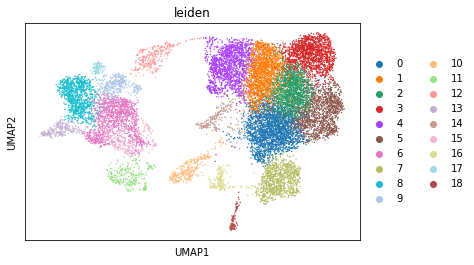

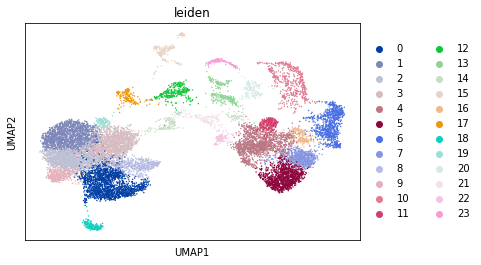

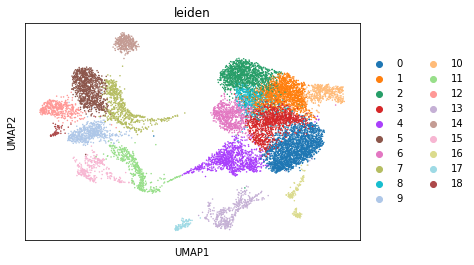

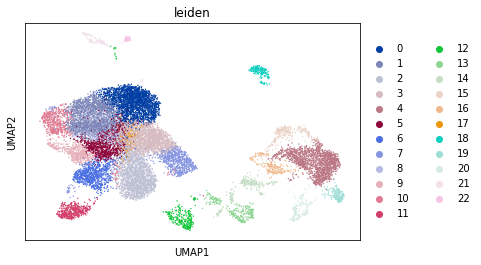

In [12]:
sc.pl.umap(opc_oligACC, color="leiden")
sc.pl.umap(opc_oligDLPFC, color="leiden")
sc.pl.umap(opc_oligHIPP, color="leiden")
sc.pl.umap(opc_oligCN, color="leiden")

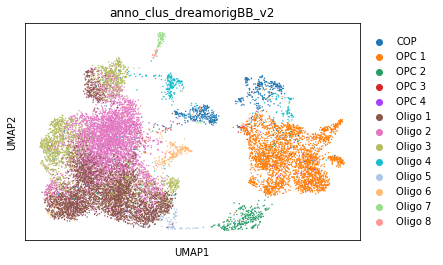

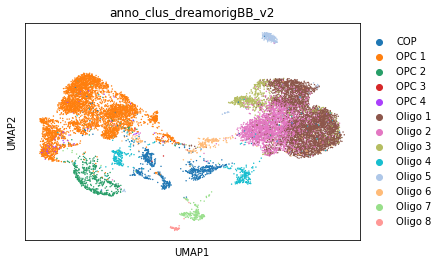

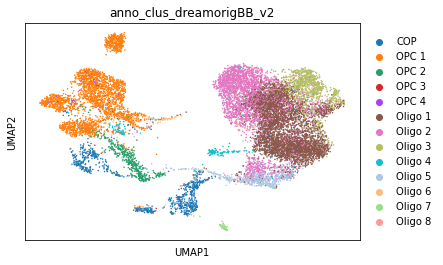

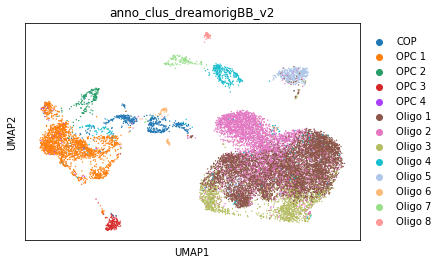

In [90]:
sc.pl.umap(opc_oligACC, color="anno_clus_dreamorigBB_v2")
sc.pl.umap(opc_oligDLPFC, color="anno_clus_dreamorigBB_v2")
sc.pl.umap(opc_oligHIPP, color="anno_clus_dreamorigBB_v2")
sc.pl.umap(opc_oligCN, color="anno_clus_dreamorigBB_v2")

In [13]:
#------ select the root_node ~ leiden cluster as the start of trajectory tree
# this is selected based on biological insight

cp.tl.trajectory_tree(opc_oligACC, root_node="5", groupby="leiden", tree=None)
cp.tl.trajectory_tree(opc_oligDLPFC, root_node="6", groupby="leiden", tree=None)
cp.tl.trajectory_tree(opc_oligHIPP, root_node="3", groupby="leiden", tree=None)
cp.tl.trajectory_tree(opc_oligCN, root_node="4", groupby="leiden", tree=None)

In [55]:
#----- this command doesn't work! CAPITAL developers are working on it!

#cp.pl.trajectory_tree(opc_oligACC)


In [14]:
#-- ugly fix provided by the developers to plot the graph network of trajectory
opc_oligACC_tree = nx.from_pandas_adjacency(opc_oligACC.uns["capital"]["tree"]["tree"],
                                            create_using=nx.DiGraph)
df_umapACC = pd.DataFrame(opc_oligACC.obsm["X_umap"],index = opc_oligACC.obs['leiden'])
pos_centroidACC = dict(zip(opc_oligACC.obs["leiden"].cat.categories,
                        df_umapACC.groupby(by='leiden').mean().values))

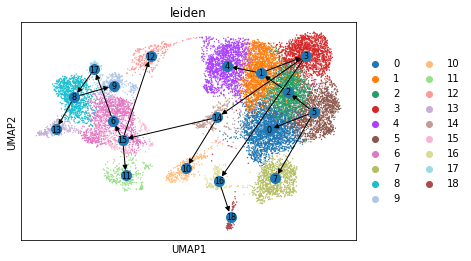

In [15]:
ax_umap = sc.pl.umap(opc_oligACC, color= ['leiden'], show=False)
nx.draw_networkx(
    opc_oligACC_tree, 
    pos=pos_centroidACC, 
    with_labels=True, 
    node_size=100,
    font_size = 8,
    ax=ax_umap,
)

In [16]:
opc_oligDLPFC_tree = nx.from_pandas_adjacency(opc_oligDLPFC.uns["capital"]["tree"]["tree"],
                                              create_using=nx.DiGraph)
df_umapDLPFC = pd.DataFrame(opc_oligDLPFC.obsm["X_umap"],index = opc_oligDLPFC.obs['leiden'])
pos_centroidDLPFC = dict(zip(opc_oligDLPFC.obs["leiden"].cat.categories,
                             df_umapDLPFC.groupby(by='leiden').mean().values))

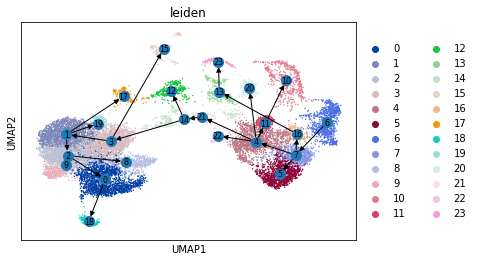

In [17]:
ax_umap = sc.pl.umap(opc_oligDLPFC, color= ['leiden'], show=False)
nx.draw_networkx(
    opc_oligDLPFC_tree, 
    pos=pos_centroidDLPFC, 
    with_labels=True, 
    node_size=100,
    font_size = 8,
    ax=ax_umap,
)

In [18]:
opc_oligHIPP_tree = nx.from_pandas_adjacency(opc_oligHIPP.uns["capital"]["tree"]["tree"],
                                              create_using=nx.DiGraph)
df_umapHIPP = pd.DataFrame(opc_oligHIPP.obsm["X_umap"],index = opc_oligHIPP.obs['leiden'])
pos_centroidHIPP = dict(zip(opc_oligHIPP.obs["leiden"].cat.categories,
                             df_umapHIPP.groupby(by='leiden').mean().values))

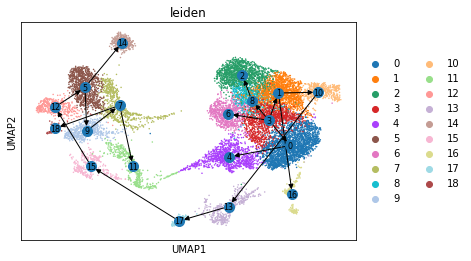

In [19]:
ax_umap = sc.pl.umap(opc_oligHIPP, color= ['leiden'], show=False)
nx.draw_networkx(
    opc_oligHIPP_tree, 
    pos=pos_centroidHIPP, 
    with_labels=True, 
    node_size=100,
    font_size = 8,
    ax=ax_umap,
)

In [20]:
opc_oligCN_tree = nx.from_pandas_adjacency(opc_oligCN.uns["capital"]["tree"]["tree"],
                                              create_using=nx.DiGraph)
df_umapCN = pd.DataFrame(opc_oligCN.obsm["X_umap"],index = opc_oligCN.obs['leiden'])
pos_centroidCN = dict(zip(opc_oligCN.obs["leiden"].cat.categories,
                             df_umapCN.groupby(by='leiden').mean().values))

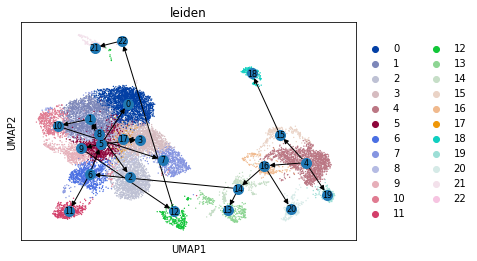

In [21]:
ax_umap = sc.pl.umap(opc_oligCN, color= ['leiden'], show=False)
nx.draw_networkx(
    opc_oligCN_tree, 
    pos=pos_centroidCN, 
    with_labels=True, 
    node_size=100,
    font_size = 8,
    ax=ax_umap,
)

In [22]:
#------- pairwise alignment of trajectories
ACC_DLPFC = cp.tl.tree_alignment(opc_oligACC, opc_oligDLPFC, num_genes1=2000, num_genes2=2000)
ACC_HIPP = cp.tl.tree_alignment(opc_oligACC, opc_oligHIPP, num_genes1=2000, num_genes2=2000)
ACC_CN = cp.tl.tree_alignment(opc_oligACC, opc_oligCN, num_genes1=2000, num_genes2=2000)


Calculating tree alignment
837 genes are used to calculate cost of tree alignment.

Calculation finished.
Calculating tree alignment
874 genes are used to calculate cost of tree alignment.



/sc/arion/projects/CommonMind/tereza/conda/envs/capital/lib/python3.9/site-packages/numpy/core/_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)


Calculation finished.
Calculating tree alignment
908 genes are used to calculate cost of tree alignment.

Calculation finished.


In [105]:
ACC_DLPFC


CapitalData(adata1=AnnData object with n_obs × n_vars = 15527 × 2000
    obs: 'orig.ident', 'nCount_RNA', 'nFeature_RNA', 'gex_barcode', 'atac_barcode', 'is_cell', 'excluded_reason', 'gex_raw_reads', 'gex_mapped_reads', 'gex_conf_intergenic_reads', 'gex_conf_exonic_reads', 'gex_conf_intronic_reads', 'gex_conf_exonic_unique_reads', 'gex_conf_exonic_antisense_reads', 'gex_conf_exonic_dup_reads', 'gex_exonic_umis', 'gex_conf_intronic_unique_reads', 'gex_conf_intronic_antisense_reads', 'gex_conf_intronic_dup_reads', 'gex_intronic_umis', 'gex_conf_txomic_unique_reads', 'gex_umis_count', 'gex_genes_count', 'atac_raw_reads', 'atac_unmapped_reads', 'atac_lowmapq', 'atac_dup_reads', 'atac_chimeric_reads', 'atac_mitochondrial_reads', 'atac_fragments', 'atac_TSS_fragments', 'atac_peak_region_fragments', 'atac_peak_region_cutsites', 'percent.mt', 'nCount_ATAC', 'nFeature_ATAC', 'sex', 'age', 'mitoRatio', 'percent.ribo', 'riboRatio', 'percent.hb', 'log10GenesPerUMI', 'nucleosome_signal', 'nucleosom

In [109]:
#----- this command doesn't work due to matplotlib clashes on minerva, CAPITAL developers are trying to fix this
#cp.pl.tree_alignment(ACC_DLPFC)

In [23]:
#--- get alignment list of aligned clusters 
ACC_DLPFC.alignmentlist

[('alignment000', ['5', '#', '#'], ['6', '7', '5']),
 ('alignment001', ['5', '#', '#', '#'], ['6', '7', '4', '11']),
 ('alignment002', ['5', '#', '#', '#'], ['6', '7', '4', '22']),
 ('alignment003', ['5', '#', '#', '#'], ['6', '7', '4', '20']),
 ('alignment004', ['5', '#', '#', '7'], ['6', '7', '4', '10']),
 ('alignment005',
  ['5', '#', '#', '2', '1', '4'],
  ['6', '7', '4', '21', '14', '12']),
 ('alignment006',
  ['5', '#', '#', '2', '1', '3', '14', '#'],
  ['6', '7', '4', '21', '14', '3', '1', '19']),
 ('alignment007',
  ['5', '#', '#', '2', '1', '3', '14', '15', '12'],
  ['6', '7', '4', '21', '14', '3', '1', '2', '9']),
 ('alignment008',
  ['5', '#', '#', '2', '1', '3', '14', '15', '6', '17', '8', '13'],
  ['6', '7', '4', '21', '14', '3', '1', '2', '0', '18', '#', '#']),
 ('alignment009',
  ['5', '#', '#', '2', '1', '3', '14', '15', '6', '17', '8', '9'],
  ['6', '7', '4', '21', '14', '3', '1', '2', '0', '18', '#', '#']),
 ('alignment010',
  ['5', '#', '#', '2', '1', '3', '14', '15'

In [24]:

#--- get list of genes which were used for alignment 
ACC_DLPFC.genes_for_tree_align

array(['JHY', 'CLEC1A', 'NOX3', 'OR2F1', 'CYP4F3', 'PROCA1', 'NLGN4Y',
       'CDK15', 'MYO3A', 'KCNH1', 'PCF11', 'SPTA1', 'CD28', 'CYB5D1',
       'GPR26', 'KMT2A', 'UST', 'TPR', 'SEZ6L', 'SEC14L4', 'KCTD16',
       'GRAP2', 'PLCB1', 'VCAN', 'EBF1', 'CHSY3', 'RASA3', 'SLC38A11',
       'ASPG', 'C8orf34', 'CACNA1A', 'KAZN', 'FGF14', 'RIMS3', 'RGS1',
       'MPND', 'CT55', 'CRH', 'TCOF1', 'CCK', 'VIM', 'PXT1', 'FGL1',
       'GRM7', 'HBA2', 'RRBP1', 'NIBAN1', 'SLC32A1', 'PRXL2B', 'ANGPTL5',
       'CDH22', 'KCND2', 'LRMDA', 'CCBE1', 'ZAN', 'TMEM74B', 'COL24A1',
       'FYB1', 'REST', 'KIF1A', 'FRMPD4', 'ICAM5', 'PHF20', 'GABRD',
       'DNAI2', 'RBMS3', 'SORBS1', 'SCML4', 'BAZ1A', 'PLEKHG1', 'SLCO1B7',
       'MEF2C', 'CXCL14', 'CFAP58', 'RASAL1', 'IQGAP2', 'ROBO2', 'KCNE4',
       'SMKR1', 'SST', 'PARP8', 'MYH13', 'IL7R', 'PITPNC1', 'NEUROD2',
       'NDNF', 'RHEBL1', 'SLC26A3', 'CBFA2T3', 'BAZ1B', 'ZNF385D', 'GAD2',
       'KYNU', 'RASGEF1B', 'GRM5', 'MYO9B', 'CD247', 'CHST11', 'SLC47

In [25]:
# ----- Run dpt (diffusion pseudotime) to calculate pseudotime for each linear alignment
cp.tl.dpt(ACC_DLPFC)
cp.tl.dtw(ACC_DLPFC, gene=ACC_DLPFC.genes_for_tree_align, multi_genes=True)


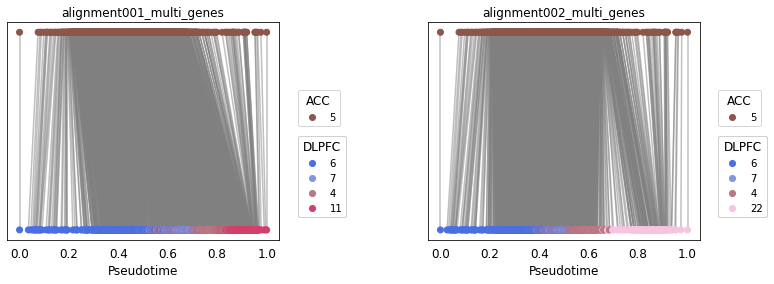

In [26]:
#------Draw the result of dynamic time warping along specified linear alignments.
#------The colors in the labels correspond to the colors of sc.pl.umap()

#alignment = select alignments of your interest; e.i. aligning clusters of interest
cp.pl.dtw(ACC_DLPFC, gene=["multi_genes"], alignment=["alignment001", "alignment002"],
          data1_name="ACC", data2_name="DLPFC")


In [ ]:
#----- plot gene expression progression within aligned trajectory (alignment001) with genes "ACTL10"
cp.pl.gene_expression_trend(ACC_DLPFC, gene="ACTL10", alignment="alignment001", fontsize=16, ticksize=16,
        multi_genes=True, switch_psedotime=True,
        data1_name="ACC", data2_name="DLPFC")

#alternative option
cp.pl.gene_expression_trend(ACC_DLPFC, "ACTL10")

In [123]:
#--------- calculate genes with high expression profile similarity
cp.tl.genes_similarity_score(ACC_DLPFC, alignment="alignment001", min_disp=0.5)


Calculating similarity score of 6272 genes in alignment001
Calculating finished


In [153]:
# lets calculate gene expression similarity for genes that have similar trends in the alignment001
ACC_DLPFC.similarity_score["alignment001"]


array(['ACTL10', 'MUC6', 'ASGR2', ..., 'GPC5', 'NLGN4Y', 'SGCZ'],
      dtype=object)

In [154]:
# get top 4 highly similar genes in alignment001
high_similarity_genes = ACC_DLPFC.similarity_score["alignment001"][:4]
print(high_similarity_genes)

# get top 4 low similarity genes in alignment001
low_similarity_genes = ACC_DLPFC.similarity_score["alignment001"][::-1][:4]
print(low_similarity_genes)

['ACTL10' 'MUC6' 'ASGR2' 'ESRP2']
['SGCZ' 'NLGN4Y' 'GPC5' 'PLCG2']


In [ ]:
#---- plot gene expression trends of highly similar genes
cp.pl.gene_expression_trend(ACC_DLPFC, high_similarity_genes, alignment="alignment001",
    data1_name="ACC", data2_name="DLPFC")

In [164]:
import session_info
session_info.show()


In [ ]:
#--------- Tutorial on the website of CAPITAL

In [138]:
adata1 = cp.dataset.setty19()

100%|██████████| 335M/335M [00:22<00:00, 15.7MB/s]   


Download completed. The dataset is saved in ../data/capital_dataset/setty19_capital.h5ad


In [139]:
adata2 = cp.dataset.velten17()

100%|██████████| 39.8M/39.8M [00:00<00:00, 112MB/s]


Download completed. The dataset is saved in ../data/capital_dataset/velten17_capital.h5ad


In [141]:
cp.tl.trajectory_tree(adata1, root_node="4", groupby="leiden", tree=None)
#cp.pl.trajectory_tree(adata1)


In [142]:
cp.tl.trajectory_tree(adata2, root_node="0", groupby="leiden", tree=None)


In [143]:
cdata = cp.tl.tree_alignment(adata1, adata2, num_genes1=2000, num_genes2=2000)


Calculating tree alignment
411 genes are used to calculate cost of tree alignment.

Calculation finished.


In [144]:
cp.tl.dpt(cdata)


In [146]:
cp.tl.dtw(cdata, gene=cdata.genes_for_tree_align, multi_genes=True)


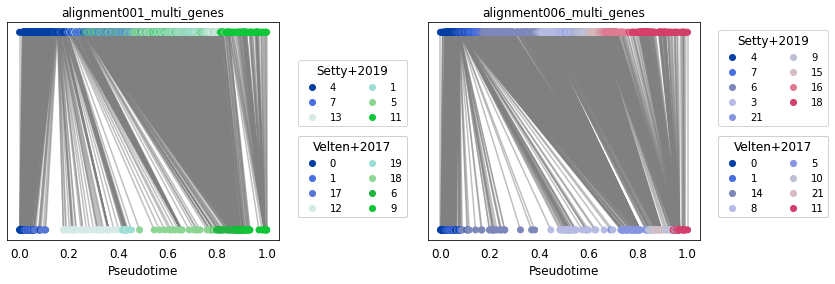

In [147]:
cp.pl.dtw(cdata, gene=["multi_genes"], alignment=["alignment001", "alignment006"],
          data1_name="Setty+2019", data2_name="Velten+2017")

In [148]:
main_markers = [
        ["alignment000", "ITGA2B"],
        ["alignment006", "LGMN"]
     ]

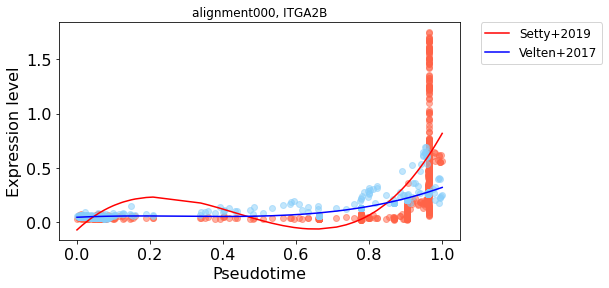

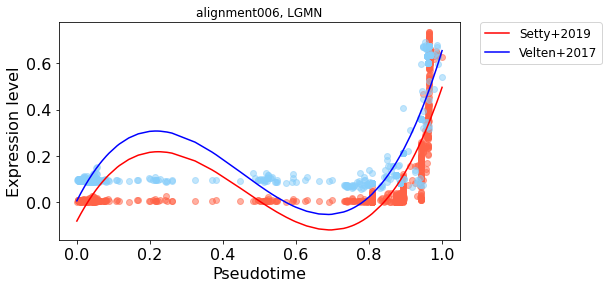

In [149]:
for alignment, gene in main_markers:
    cp.pl.gene_expression_trend(
        cdata, gene=gene, alignment=alignment, fontsize=16, ticksize=16, multi_genes=True, switch_psedotime=True,
        data1_name="Setty+2019", data2_name="Velten+2017", polyfit_dimension=3
    )

In [150]:
cp.tl.genes_similarity_score(cdata, alignment="alignment002", min_disp=0.5)


Calculating similarity score of 5148 genes in alignment002
Calculating finished


In [151]:
cdata.similarity_score["alignment002"]


array(['HN1', 'WHSC1', 'TROAP', ..., 'ARPP21', 'FCRL1', 'NBEAL1'],
      dtype=object)

['HN1' 'WHSC1' 'TROAP' 'TESC']


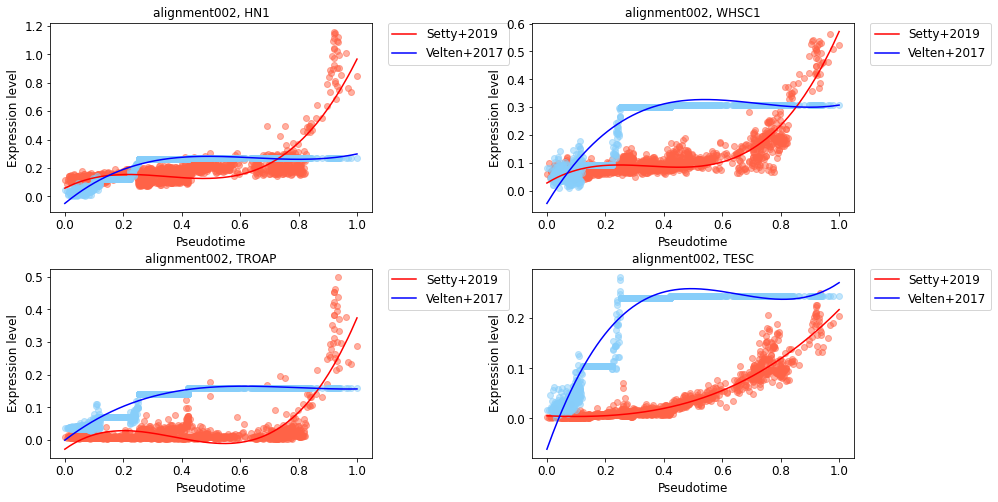

In [152]:
high_similarlity_genes = cdata.similarity_score["alignment002"][:4]
print(high_similarlity_genes)
cp.pl.gene_expression_trend(cdata, high_similarlity_genes, alignment="alignment002",
    data1_name="Setty+2019", data2_name="Velten+2017")

In [157]:
cdata

CapitalData(adata1=AnnData object with n_obs × n_vars = 5780 × 1999
    obs: 'n_genes', 'leiden', 'alignment000_dpt_pseudotime', 'alignment001_dpt_pseudotime', 'alignment002_dpt_pseudotime', 'alignment003_dpt_pseudotime', 'alignment004_dpt_pseudotime', 'alignment005_dpt_pseudotime', 'alignment006_dpt_pseudotime', 'alignment007_dpt_pseudotime'
    var: 'n_cells', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'diffmap_evals', 'hvg', 'leiden', 'leiden_colors', 'leiden_sizes', 'neighbors', 'paga', 'pca', 'umap', 'cluster_centroid', 'capital', 'root_cell'
    obsm: 'X_diffmap', 'X_pca', 'X_umap'
    varm: 'PCs'
    obsp: 'connectivities', 'distances', adata2=AnnData object with n_obs × n_vars = 915 × 249
    obs: 'n_genes', 'n_counts', 'leiden', 'alignment000_dpt_pseudotime', 'alignment001_dpt_pseudotime', 'alignment002_dpt_pseudotime', 'alignment003_dpt_pseudotime', 'alignment004_dpt_pseudotime', 'alignment005_dpt_pseudotime', 'alignment006_dpt_pseudotime', 'alignm